**Chapter 01 [Language Processing and Python](http://www.nltk.org/book/ch01.html)**

我们很容易获取上百万的文本数据，能通过简单的程序做些什么？本章将回答以下问题：

1. 我们能通过简单的编程技术处理大量的文本吗？
1. 如何自动提取关键词和短语并总结文本的风格和内容？
1. Python 提供了什么工具和技术来做这些工作？
1. 什么是自然语言处理的有意思的挑战？

# 计算机语言：文本和单词
我们很熟悉文本，每天都对它读读写写。这里我们尝试将文本作为我们缩写的程序的原始数据，程序通过各种有趣的方式操作和分析。但是在这之前，我们先了解 Python。

## 了解Python
## 了解NLTK

我们先下载 https://github.com/nltk/nltk_data ，然后通过 IPythn 导入。`from nltk.book import *`。

In [2]:
import nltk
nltk.data.find(".")

FileSystemPathPointer('/home/qinjh/nltk_data')

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


任何时候我们都可以找到这些文本，只需输入文本名称：

In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

## 查找文本

有很多方式通过简单阅读来检测文本的上下文。索引试图展示给定单词的出现，并伴随上下文。这里在《Moby Dick》查找单词 *monstrous* ：

In [7]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


第一次在指定文本使用 *concordance* ，它花费几秒钟时间构建索引以便后续的快速查找。

一旦花了些时间来研究这些文本，我们希望你对语言的丰富性和多样性有新的认识。在下一张，你将学习如何访问大量的文本，包括英语之外的其他语言。

一个索引允许我们在上下文查找单词。例如我们在上下文中看到的 *monstrous* 类似 `the __ pictures`, `the __ size` 。有些什么单词出现在类似的上下文？ 我们可以通过 `similar` 找出类似名称的文本，然后在括号中插入相关词：

In [10]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [11]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [12]:
text3.similar("monstrous")

No matches


> `similar()` 函数会在文本中 搜索具有类似结构的其他单词, 不过貌似这个函数只会考虑一些简单的指标,来作为相似度,比如上下文的词性,更多的完整匹配, 不会涉及到语义. 
>
> 这个可以看出的是, text1 和text2 对同一个单词monstrous 的不同使用风格.

观察后我们在不同的文本得到不同的结果。_Austen_ 使用这个单词与 _Melville_ 十分不同，对于她，_monstrous_ 有着正面内涵，有时候它的功能就像 _very_ 的增强剂。

术语 `common_contexts` 允许我们检测这个词的上下文所共享的两个或两个以上的单词，例如 _monstrous_ 和 _very_ ：

In [13]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


它自动检测指定单词在文本中的出现，并将出现相同上下文的展示出来。然而，我们也可以确定在文本中的单词 _location_ ：从它开始出现有多少单词。位置信息可以通过 `disperslon_plot` 展示。每一条表示一个单词的实例，每一行表示整个文本。在下图，我们看到几个单词在文本中的大致位置（前提是得安装好 Numpy 和 Matplotlib）：

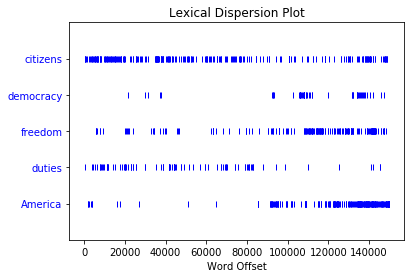

In [18]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

现在，我们尝试生成一些我们刚才见过的各种风格的随机文本。我们使用 `generate()` ：

In [26]:
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

## 统计词汇
本节，将看到如何使用计算机通过各种方式来统计文本的单词。

In [27]:
len(text3)

44764

一个 **token** 是指一个字符序列的名称 —— 例如 _hairy_, _his_ 等，我们想要尝试作为一个群体。当我们统计文本中的 token 时，就是说，这句话是或者不是我们计算出的这些序列。在我们的例子中出现的短语可能有两个，或者一个，或者一个没有。但是，只有四个不同词汇的短语。文本中包含了多少个不同的单词？用 Python 来处理，我们必须指出问题的不同之处。文本中的词汇只是所使用的标记集合，因为是一个集合，所有副本都一起塌陷。在 Python 中我们获取 `text3` 的词汇使用命令 `set(text3)`，这样做的话，许多单词会在屏幕飞过：

In [30]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [31]:
len(set(text3))

2789

可以看到，上面的集合是大小写敏感的。

现在，我们计算文本的词汇丰富量。

In [32]:
len(set(text3)) / len(text3)

0.06230453042623537

接下来，我们专注于特定单词。我们统计一个单词在文本中出现了几次，并计算百分比。

In [35]:
text3.count("smote")

5

In [36]:
100 * text4.count('a') / len(text4)

1.457973123627309

In [37]:
text3.concordance("smote")

Displaying 5 of 5 matches:
d the kings that were with him , and smote the Rephaims in Ashteroth Karnaim , 
to Enmishpat , which is Kadesh , and smote all the country of the Amalekites , 
he and his servants , by night , and smote them , and pursued them unto Hobah ,
em , and shut to the door . And they smote the men that were at the door of the
d , and Hadad the son of Bedad , who smote Midian in the field of Moab , reigne


In [38]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [39]:
text1.count("monstrous")

10